#### 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read the data as a data frame

In [2]:
Data  = pd.read_csv('insurance.csv')

#### 3. Basic EDA

#### 3a. Shape of the data

In [3]:
Data.shape

(1338, 7)

#### 3b. Data type of each attribute

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


#### 3c. Checking the presence of missing values

In [5]:
Data.isnull().values.any()

False

In [6]:
print(Data.isnull().sum())  #to print the number of missing values in each column
print("\n")
print("Total Number of missing values in the dataset: ", Data.isnull().sum().sum())  #to print the number of missing values overall

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Total Number of missing values in the dataset:  0


###### there are no missing values

#### 3d. 5 point summary of numerical attributes

In [7]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

##### Distribution of ‘bmi’

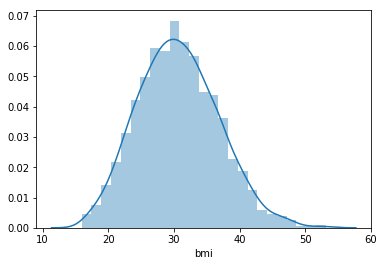

In [8]:
sns.distplot(Data['bmi'])

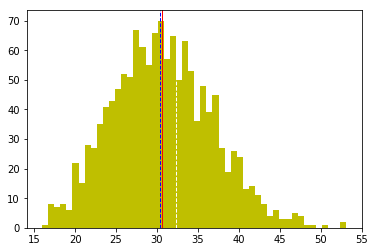

In [9]:
plt.figure(figsize=(6,4))
plt.hist(Data['bmi'], color='y', bins = 50) # plots a simple histogram
plt.axvline(Data['bmi'].mean(), color='r', linewidth=1)
plt.axvline(Data['bmi'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Data['bmi'].mode()[0], color='w', linestyle='dashed', linewidth=1)

Here we can observe that Mean is very near to Median and mode is slightly higher than these two

##### Distribution of ‘age'

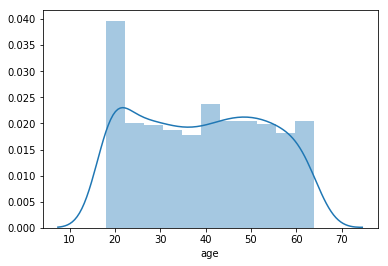

In [10]:
sns.distplot(Data['age'])

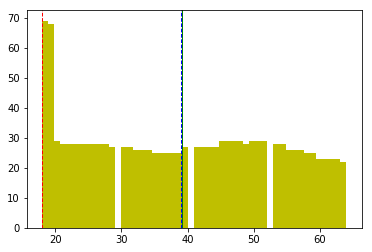

In [11]:
plt.figure(figsize=(6,4)) 
plt.hist(Data['age'], color='y', bins = 50) # plots a simple histogram
plt.axvline(Data['age'].mean(), color='g', linewidth=1)
plt.axvline(Data['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Data['age'].mode()[0], color='r', linestyle='dashed', linewidth=1)

Here we can observe that Age is almost uniformly distributed and Mean is very near to Median and mode is lesser than these two

##### Distribution of 'charges'

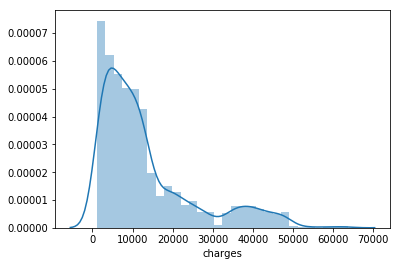

In [12]:
sns.distplot(Data['charges'])

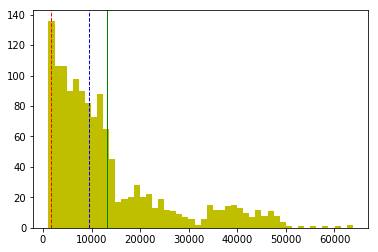

In [13]:
plt.figure(figsize=(6,4))
plt.hist(Data['charges'], color='y', bins= 50) # plots a simple histogram
plt.axvline(Data['charges'].mean(), color='g', linewidth=1)
plt.axvline(Data['charges'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Data['charges'].mode()[0], color='r', linestyle='dashed', linewidth=1)

We can clearly observe from here that data is slightly skewed towards right with Mode < Median < Mean therefore it is positively skewed

#### 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

##### Measure of skewness of ‘bmi’

In [14]:
Data['bmi'].skew()

0.2840471105987448

This shows that column 'bmi' is skewed towards right i.e. positively skewed with skewness score 0.28

##### Measure of skewness of ‘age'

In [15]:
Data['age'].skew()

0.05567251565299186

This shows that column 'age' is slightly skewed towards right i.e. positively skewed with skewness score 0.05

##### Measure of skewness of 'charges'

In [16]:
Data['charges'].skew()

1.5158796580240388

This shows that column 'charges' is highly skewed towards right i.e. positively skewed with skewness score 1.52

#### 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and 'charges'

##### Checking the presence of outliers in ‘bmi’

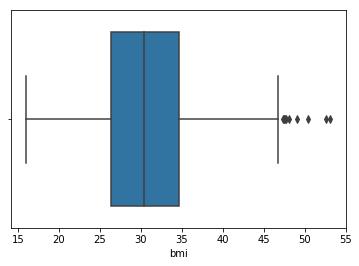

In [17]:
sns.boxplot(x=Data['bmi'])

Above plot shows few points between 46 to 55, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

##### Checking the presence of outliers in ‘age'

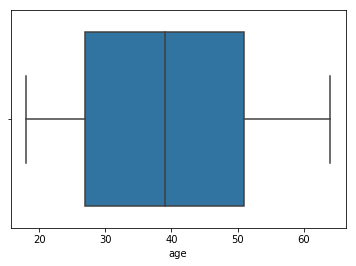

In [18]:
sns.boxplot(x=Data['age'])

Above plot shows there are no outliers and all the observations are near the quartiles.

##### Checking the presence of outliers in ‘charges'

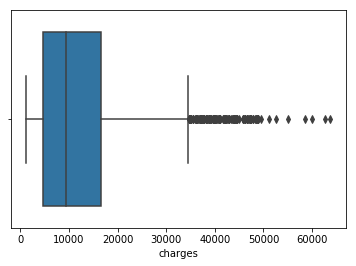

In [19]:
sns.boxplot(x=Data['charges'])

Above plot shows a lot of points above 35000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

#### 3h. Distribution of categorical columns (include children)

##### Distribution of column 'Sex'

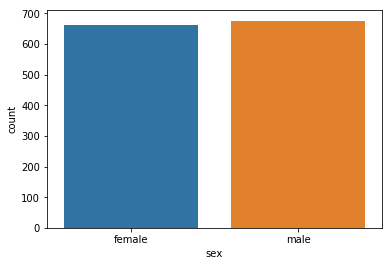

In [20]:
sns.countplot(x=Data['sex'])

##### Distribution of column 'smoker'

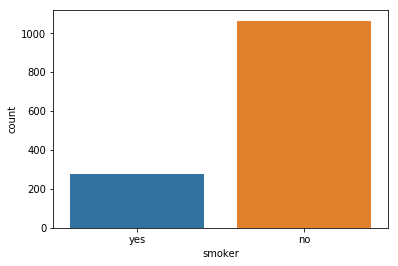

In [21]:
sns.countplot(x=Data['smoker'])

##### Distribution of column 'region'

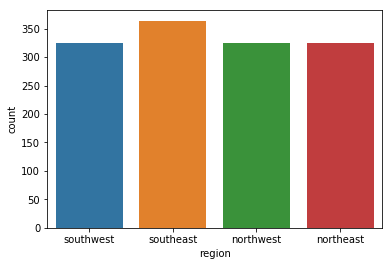

In [22]:
sns.countplot(x=Data['region'])

##### Distribution of column 'children'

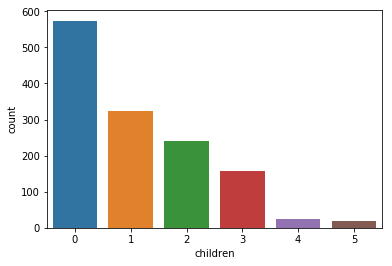

In [23]:
sns.countplot(x=Data['children'])

#### 3i. Pair plot that includes all the columns of the data frame

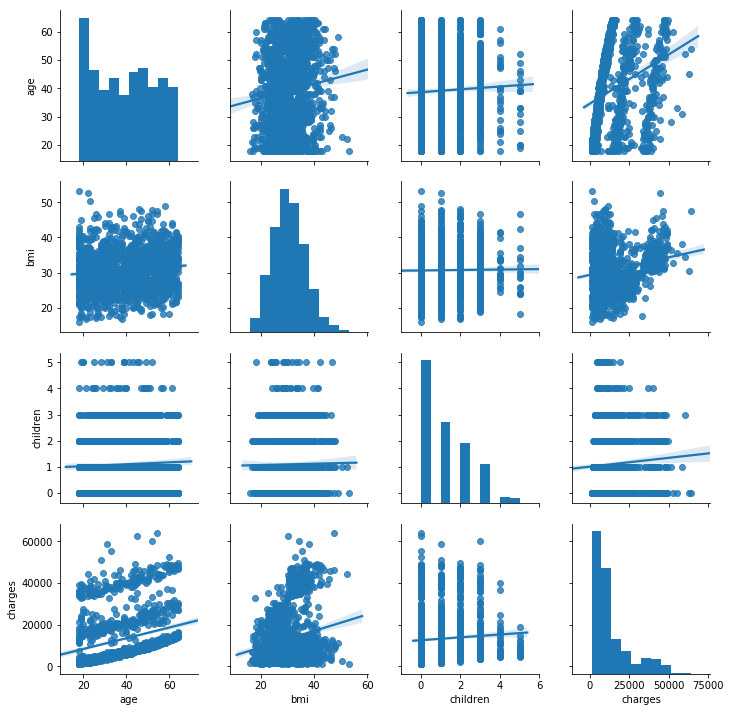

In [24]:
sns.pairplot(Data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

#### 4a. Do charges of people who smoke differ significantly  from the people who don't? 

###### Null Hypothesis:   Ho = "Charges of smoker and non-smoker are same"   
###### Alternate Hypothesis:  Ha = "Charges of smoker and non-smoker are not the same"   

In [25]:
gr1 = Data[Data.smoker == 'yes']

In [26]:
smoker_yes = gr1['charges']

In [27]:
gr2 = Data[Data.smoker == 'no']

In [28]:
smoker_no = gr2['charges']

In [29]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [30]:
t_statistic, p_value = ttest_ind(smoker_yes, smoker_no)
print(t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


##### as p-value (= 8.271435842177219e-283) is less than alpha (= 0.05), so, null is to be rejected and hence we conclude that Charges of smoker and non-smoker are not the same.

#### 4b. Does bmi of males differ significantly from that of  females?  

##### Null Hypothesis: Ho = "bmi of both male and female are same"  
##### Alternate Hypthesis: Ha = "bmi of both male and female are not the same"   

In [31]:
gr3 = Data[Data.sex == 'male']

In [32]:
sex_male = gr3['bmi']

In [33]:
gr4 = Data[Data.sex == 'female']

In [34]:
sex_female = gr4['bmi']

In [35]:
t_statistic, p_value = ttest_ind(sex_male, sex_female)
print(t_statistic,p_value)

1.696752635752224 0.08997637178984932


##### as p-value (= 0.08997637178984932) is more than alpha (= 0.05), so, we fail to reject null and hence we conclude that bmi of male & female are same.

#### 4c. Is the proportion of smokers significantly different  in different genders? 

##### We will use Chi_square test to check if smoking habits are different for different genders
##### Null Hypothesis: Ho = "Gender has no effect on smoking habits"   
##### Alternate Hypothesis: Ha = "Gender has an effect on smoking habits"

In [36]:
crosstab = pd.crosstab(Data['sex'],Data['smoker'])  # Contingency table of sex and smoker attributes
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.006548143503580696


##### as p-value (= 0.006548143503580696) is less than alpha (= 0.05), so, null is to be rejected and hence we conclude that Proportion of smokers in males is significantly different from that of the females and hence, Gender has an effect on smoking habits

#### 4d. Is the distribution of bmi across women with no  children, one child and two children, the same?

#### Null Hypothesis: Ho = "No. of children has no effect on bmi"
#### Alternate Hypothesis: Ha = "No. of children has an effect on bmi"

In [37]:
female_gr = Data[Data['sex'] == 'female']

In [38]:
female_gr_0 = female_gr[female_gr.children == 0]['bmi']
female_gr_1 = female_gr[female_gr.children == 1]['bmi']
female_gr_2 = female_gr[female_gr.children == 2]['bmi']

In [39]:
f_stat, p_value = stats.f_oneway(female_gr_0,female_gr_1,female_gr_2)
p_value

0.7158579926754841

##### as p-value (= 0.7158579926754841) is more than alpha (= 0.05), so, we fail to reject null and hence we conclude that BMI is not changed by the number of children a women has.